In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import LogNorm



In [2]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [3]:
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_sibyll23c_smooth_R_integration_optimization_oneregion.pkl", "rb") as f:
    results = pickle.load(f)

In [4]:
results

{('1.5', '5', '50', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9328923011395557,
  0.9331504270436715,
  0.9352322831319306],
 ('1.5', '5', '51', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9325381685709421,
  0.9327949930675024,
  0.9349295994200442],
 ('1.5', '5', '52', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9321953637360656,
  0.9324476451385475,
  0.934629023017072],
 ('1.5', '5', '53', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9318635958868702,
  0.9321086502917069,
  0.9343307588737072],
 ('1.5', '5', '54', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9314476815256034,
  0.9317780089779933,
  0.9340349988774146],
 ('1.5', '5', '55', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9310465578905345,
  0.9314555018530755,
  0.9337419232420335],
 ('1.5', '5', '56', '1.0', '1.0', '2212', 'jan', '2.95'): [0.930767544091296,
  0.9311408581277684,
  0.9334517018253367],
 ('1.5', '5', '57', '1.0', '1.0', '2212', 'jan', '2.95'): [0.9304986725197175,
  0.9308338272974489,
  0.9331644953827152],
 ('1.5', '

In [13]:
# Define fixed parameters
fixed_depth = '3.5'
fixed_cs_p = '1.01'
fixed_cs_k = '1.0'
fixed_ptype = '2212'
fixed_season = 'apr'
fixed_e0 = '2.95'

# Extract x and y values
x_values = np.linspace(5, 50, 45, dtype=int)  # Lower limits
y_values = np.linspace(50, 95, 45, dtype=int)  # Upper limits

# Initialize empty matrix
matrix_35 = np.zeros((45, 45))

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        key = (fixed_depth, str(x), str(y), fixed_cs_p,fixed_cs_k, fixed_ptype, fixed_season, fixed_e0)
        value = results.get(key, np.nan)  # Use NaN if key is missing
        
        # Check if value is a sequence (like a list or array), and if so, take the first value or some aggregate
        if isinstance(value, (list, np.ndarray)):
            value = np.mean(value)  # You can also use np.mean(value) or np.sum(value) depending on the context - for one particular angle
        
        matrix_35[i, j] = value

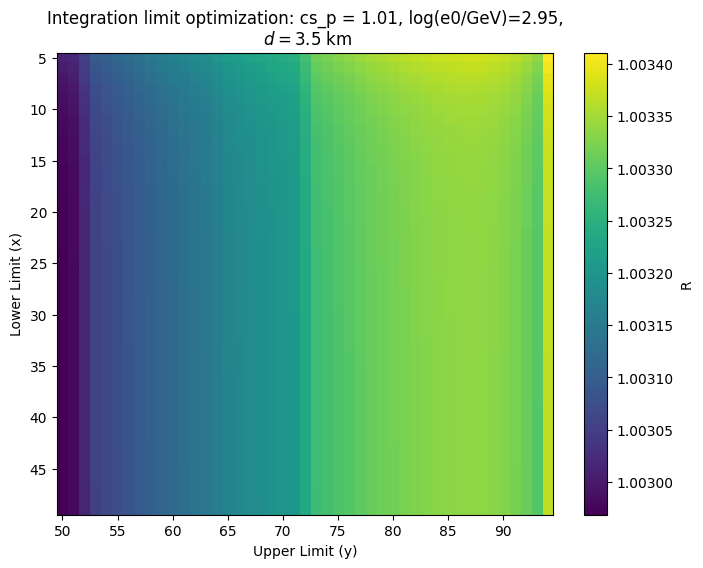

In [ ]:


plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.imshow(matrix_35, cmap='viridis', aspect='auto')
plt.colorbar(label='R')
xticks = np.arange(0, len(y_values), 5)
yticks = np.arange(0, len(x_values), 5)

plt.xticks(ticks=xticks, labels=y_values[xticks])
plt.yticks(ticks=yticks, labels=x_values[yticks])
plt.xlabel("Upper Limit (y)")
plt.ylabel("Lower Limit (x)")
plt.title("Integration limit optimization: cs_p = 1.01, log(e0/GeV)=2.95,\n $d=3.5$ km")
plt.savefig(plot_dir + "R_optimization_oneregiondepth3.5.png")

In [15]:
# Define fixed parameters
fixed_depth = '1.5'
fixed_cs_p = '1.01'
fixed_cs_k = '1.0'
fixed_ptype = '2212'
fixed_season = 'apr'
fixed_e0 = '2.95'

# Extract x and y values
x_values = np.linspace(5, 50, 45, dtype=int)  # Lower limits
y_values = np.linspace(50, 95, 45, dtype=int)  # Upper limits

# Initialize empty matrix
matrix_15 = np.zeros((45, 45))

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        key = (fixed_depth, str(x), str(y), fixed_cs_p,fixed_cs_k, fixed_ptype, fixed_season, fixed_e0)
        value = results.get(key, np.nan)  # Use NaN if key is missing
        
        # Check if value is a sequence (like a list or array), and if so, take the first value or some aggregate
        if isinstance(value, (list, np.ndarray)):
            value = np.mean(value)  # You can also use np.mean(value) or np.sum(value) depending on the context - for one particular angle
        
        matrix_15[i, j] = value

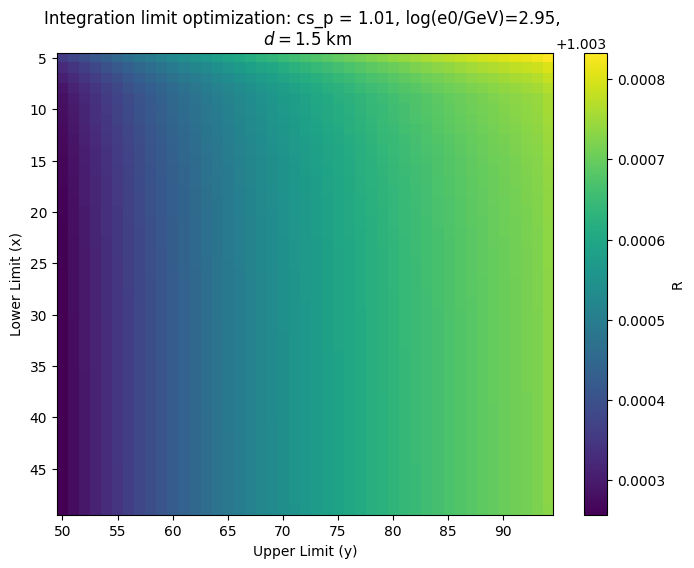

In [22]:
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.imshow(matrix_15, cmap='viridis', aspect='auto')
plt.colorbar(label='R')
xticks = np.arange(0, len(y_values), 5)
yticks = np.arange(0, len(x_values), 5)

plt.xticks(ticks=xticks, labels=y_values[xticks])
plt.yticks(ticks=yticks, labels=x_values[yticks])
plt.title("Integration limit optimization: cs_p = 1.01, log(e0/GeV)=2.95, \n $d=1.5$ km")
plt.xlabel("Upper Limit (y)")
plt.ylabel("Lower Limit (x)")
plt.savefig(plot_dir + "R_optimization_oneregiondepth1.5.png")

In [ ]:
matrix_15[19,60-45]

np.float64(1.0034910075255066)

In [ ]:
matrix_15[19,80-45]

np.float64(1.0036724393440832)

In [17]:
# get derivative

def dRdsigma(R):
    """
    Compute dR/dsigma for each element in the matrix R.

    Parameters:
    R (numpy.ndarray): A 2D array of shape (45,45) representing the matrix R.

    Returns:
    numpy.ndarray: A 2D array of shape (45,45) containing the derivative values.
    """
    R1 = 1.
    sig1 = 1.
    sig2 = 1.01

    deriv = (R - R1) / (sig2 - sig1)  # Element-wise computation
    return deriv

In [20]:
dRdsigma_15 = dRdsigma(matrix_15)
dRdsigma_35 = dRdsigma(matrix_35)

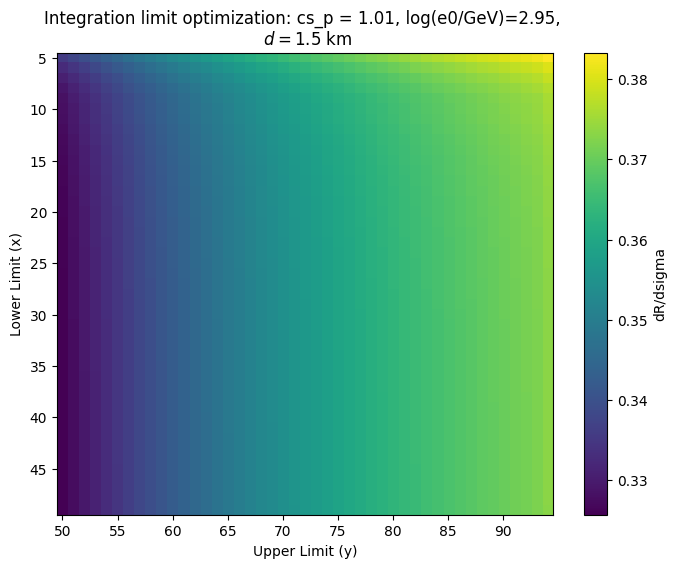

In [23]:
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.imshow(dRdsigma_15, cmap='viridis', aspect='auto')
plt.colorbar(label='dR/dsigma')
xticks = np.arange(0, len(y_values), 5)
yticks = np.arange(0, len(x_values), 5)

plt.xticks(ticks=xticks, labels=y_values[xticks])
plt.yticks(ticks=yticks, labels=x_values[yticks])
plt.title("Integration limit optimization: cs_p = 1.01, log(e0/GeV)=2.95, \n $d=1.5$ km")
plt.xlabel("Upper Limit (y)")
plt.ylabel("Lower Limit (x)")
plt.savefig(plot_dir + "dRdsigma_optimization_oneregiondepth1.5.png")

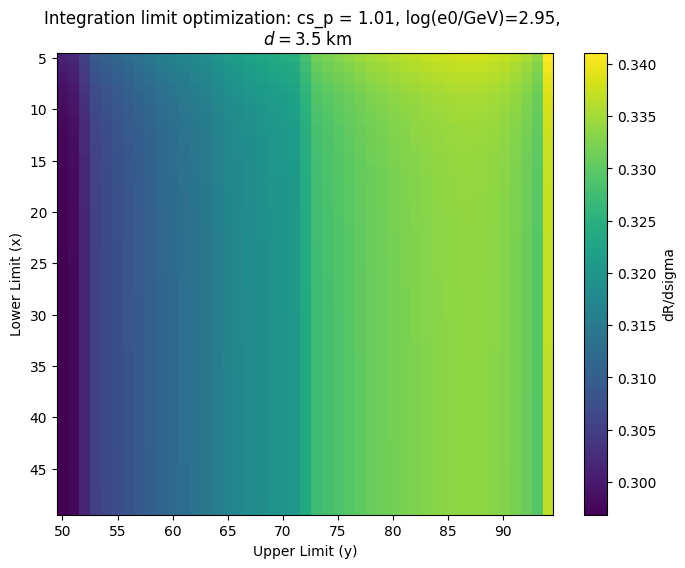

In [24]:
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.imshow(dRdsigma_35, cmap='viridis', aspect='auto')
plt.colorbar(label='dR/dsigma')
xticks = np.arange(0, len(y_values), 5)
yticks = np.arange(0, len(x_values), 5)

plt.xticks(ticks=xticks, labels=y_values[xticks])
plt.yticks(ticks=yticks, labels=x_values[yticks])
plt.title("Integration limit optimization: cs_p = 1.01, log(e0/GeV)=2.95, \n $d=3.5$ km")
plt.xlabel("Upper Limit (y)")
plt.ylabel("Lower Limit (x)")
plt.savefig(plot_dir + "dRdsigma_optimization_oneregiondepth3.5.png")